# Stabile Diffussion (SD) from Stability AI

**Params:**
- **steps** - # SD starts w/ an image that consists of random noise. It continuously denoises the image to form the desired prompt. `steps` determine's the quantity of steps in the process. It seens as "quality slider"; however, this isn't always true because a higher number of steps may introduced unwanted charactericis.
- **cfg_scale** - How closely the SD engine should follow the prompt. CFG stands for "Classifier Free Guidance"

In [ ]:
pip install stability_sdk

In [11]:
import os
import io
import warnings
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
from dotenv import dotenv_values

In [12]:
config = dotenv_values(".env")

In [13]:
stability_api = client.StabilityInference(
    key=config["STABILITY_AI_KEY"],
    verbose=True,
)

In [23]:
answers = stability_api.generate(
    prompt="a beautiful mermaid who is queen of the ocean and oversees a society of other mermaids who live in an underwater eutopia",
    seed=100,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    samples=1,
    sampler=generation.SAMPLER_K_DPMPP_2M, # default
)

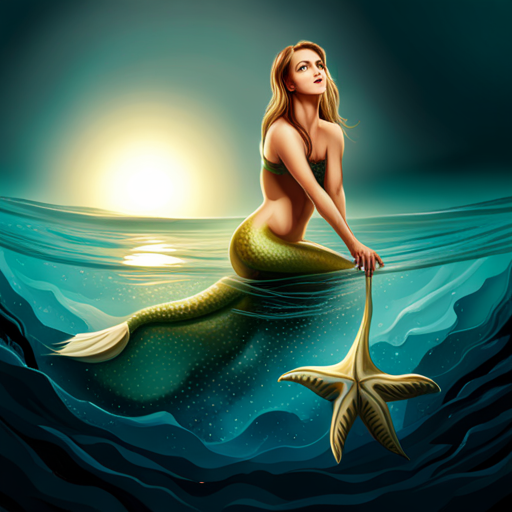

In [24]:
# asssess whether adult content classifier is tripped.
# If addult content classifier is not tripped, save generated images.
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request acticated the API's safety filters and could not be processed."
                "Please modify the prompt and try again."
            )
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)
            # save the generated image with its seed number as the filename
            # img.save(str(artifact.seed) + ".png")